In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing Dataset
df = pd.read_csv("Position_Salaries.csv")

In [3]:
#View The Data
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#View The Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
#View The Shape of Data
df.shape

(10, 3)

In [6]:
#Check if There is Any NUll Values in Data
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
#Defining Features & Label of Data
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [8]:
#X is a Matrix
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
#Y is a Vector
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

We're not going to Split the dataset cause, our Dataset is small

Fitting Linear Regression to the Dataset

In [13]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [14]:
#Fit Data into Linear Regression
lin_reg.fit(X, y)

LinearRegression()

In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

Fitting Polynomial Regression to the Dataset

In [16]:
#Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4) #You can Change The Degree Values Upper/Lower to Experience Best Result

In [17]:
#Fit Data into Polynomial Features
X_poly = poly_reg.fit_transform(X)

In [18]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [19]:
#Fit The Polynomial Regression Object to a new Linear Regression Object
lin_reg2 = LinearRegression()

lin_reg2.fit(X_poly, y)

LinearRegression()

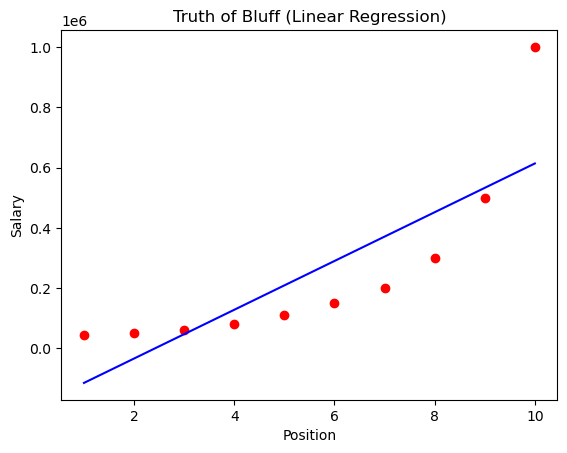

In [20]:
#Visualizing The Linear Regression Results
plt.scatter(X, y,
            color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue') #Original Feature and Linear Regression's Feature
plt.title("Truth of Bluff (Linear Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

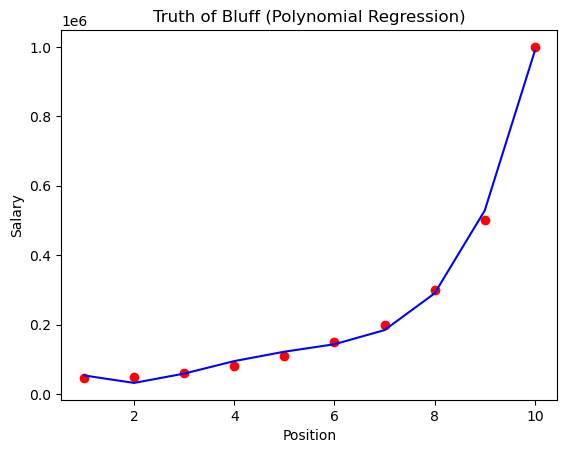

In [21]:
#Visualizing The Polynimoal Regression Results
plt.scatter(X, y,
            color = 'red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue') #Original Feature and Linear Regression's Feature
plt.title("Truth of Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

We've better results now but still experienced that, we still have little
linear line between point-point observations. To get rid of it, follow the process

In [22]:
#Create a new X which contain incremental steps between the level with resolution 0.1 (Small Steps)
#np.arrange(Lower Bound(X), Upper Bound(X), Incrementation)
X_grid = np.arange(min(X), max(X), 0.1)

#This Will Give us a Vector but We Need Actually Matrix

#Convert The Vector into Matrix
X_grid = X_grid.reshape(len(X_grid), 1) #1 is the Number of Column

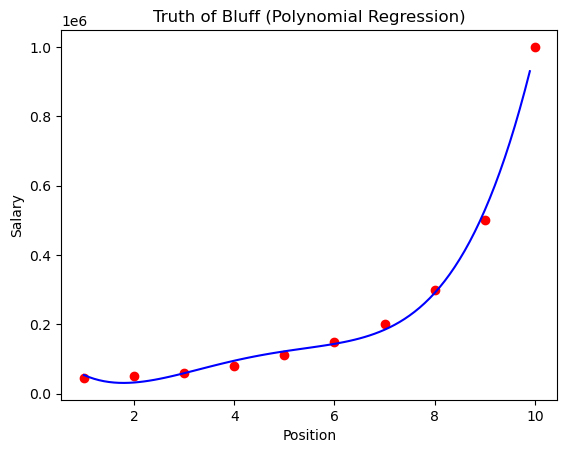

In [23]:
plt.scatter(X, y,
            color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue') #Original Feature and Linear Regression's Feature
plt.title("Truth of Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [30]:
#Predict a New Result With Linear Regression
lin_reg.predict([[6.5]]) #Drop the Level Point


array([330378.78787879])

In [31]:
#Predict a New Result With Polynomial Regression
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])